In [1]:
from random import randint

In [48]:
img = [[[int(randint(0,256)) for i in range(3)] for i in range (80)] for i in range(60)]

In [11]:
import matplotlib.pyplot as plt

In [61]:
def py_noiser(hres, vres):
    return [[[randint(0,256) for i in range(3)] for i in range (hres)] for i in range(vres)]

In [58]:
%timeit py_noiser(640,480)

2.03 s ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
img = py_noiser(640,480)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


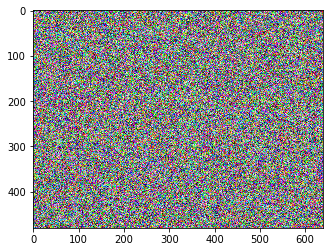

In [63]:
plt.imshow(img)

In [53]:
import numpy as np

In [68]:
def numpy_noiser(hres, vres):
    return np.random.randint(0,256, size = (vres, hres, 3), dtype = ('uint8'))



In [71]:
%timeit numpy_noiser(640, 480)

2.89 ms ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
img2 = numpy_noiser(640, 480)

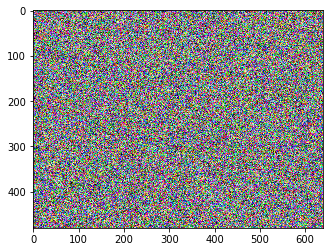

In [70]:
plt.imshow(img2)

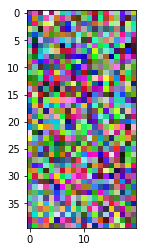

In [56]:
plt.imshow(img2)

0

In [24]:
import pprint

In [31]:
dict = {i:img.count(i) for i in range(0,256)}

In [33]:
dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

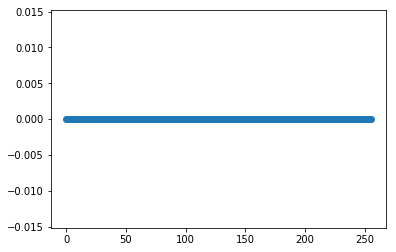

In [32]:
plt.scatter(dict.keys(), dict.values())